# $0-\pi$ Qubit 
In this notebook, we use Qcircuit to find the spectrum of the $0-\pi$ Qubit based on the following paper:  
_Coherence properties of the 0-π qubit_

First, we import the Qcircuit from circuitClass file and specify a number for each nodes on the circuit. The number for each node should be consecutive integer starts from zero(corresponds to circuit ground.) 

In [80]:
# Import circuitClass that contains Qcircuit
from circuitClass import *

<img src="pics/zeroPiQubit_pic1.png" width="250">

We use Parameter Set 3 of the paper. By the following cell, we find the correspondance capacitance, inductance, and JJ energies to those values.

<img src="pics/zeroPiQubit_pic2.png" style="height:210px">

In [88]:
E_L = hbar*2*np.pi*4*GHz

In [90]:
(Phi0/2/np.pi)**2/E_L

4.0865345350198946e-08

In [81]:
E_C = hbar*2*np.pi*0.15*GHz
E_CJ = hbar*2*np.pi*10*GHz
E_J = hbar*2*np.pi*5*GHz
E_L = hbar*2*np.pi*0.13*GHz
C = e**2/2/E_C
C_J = e**2/2/E_CJ
L = (Phi0/2/np.pi)**2/E_L

We create the object of Qcircuit by initializing it with `circParam` dictionary.

In [82]:
# cicuitParam is a dictionary that contains the information about the graph structure,
# capacitor values, inductor values, and Josephson Junction Values.
# inductors should be in Henry
# capacitors should be in Farad
# JJ energies should be in Hz
circuitParam={'graph':[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]],
            'inductors':[None,L, None ,None,L,None],
            'capacitors':[C_J,0,C,C,0,C_J],
            'JJs':[E_J/(2*np.pi*hbar),None,None,None,None,E_J/(2*np.pi*hbar)]}

# cr is an object of Qcircuit
cr1 = Qcircuit(circuitParam)

By `cr1.setModeNumbers([m,m,m])`, we set the accuracy of the solver. For this circuit, Qcircuit converges with $m=25$. Next, we should call `cr1.configure()` to set up the equations needed to calculate the Hamiltonian.

In [83]:
m=25
# call this function to set the truncation number for each mode of the circuit. 
cr1.setModeNumbers([m,m,m])

# call this function to set up equations and preprocesses needed to calculate the Hamiltonian.
cr1.configure()

By applying `cr1.getExternalLinks()`, we find the inductive loops that we can apply external fluxes to them.

In [84]:
cr1.getExternalLinks()

[[0, 2, 3, 1]]

Qcircuit tells us that we can apply external fluxes to inductive loops created by the `[0,2,3,1]` cycle. Therefore, by calling `cr1.setExcitation([phiExt])`, we apply array of external fluxes to that specific loop.

In [85]:
# set external fluxes for each inductive loops of the circuit.
phiExt = np.linspace(0,1,100)*2*np.pi
cr1.setExcitation([phiExt])

By running the below cell, Qcircuit calculates the Hamiltonian and find the first 5 eigenvalues and eigenvectors of the system for each external fluxes.

In [86]:
# run the solver to calculate the eigenvalues and eigenvectors of the Hamiltonian for 
# specific number of bands
cr1.run(numBand = 5,showLoading=False)

The eigenValues are stored in the `cr1.HamilEigVal` variable in units of angular frequancy. The first index of the `cr1.HamilEigVal` refers to band number, and the second index refers to the index of external fluxes specified in `phiExt`. Therefore, the next cell plots the spectrum of the circuit.

Text(0, 0.5, 'GHz')

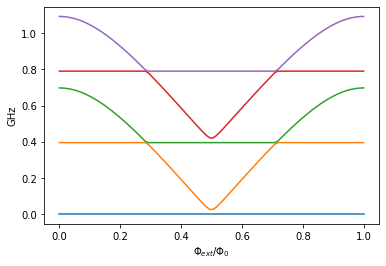

In [87]:
plt.figure()
for i in range(5):
    plt.plot(phiExt/2/np.pi,(cr1.HamilEigVal[i,:]-cr1.HamilEigVal[0,:]).real/GHz/2/np.pi)

plt.xlabel("$\Phi_{ext}/\Phi_0$")
plt.ylabel("GHz")

The next cell shows the spectrum from the paper, which is the same spectrum that Qcircuit calculated.

<img src="pics/zeroPiQubit_pic3.png" style="height:500px">